# EXER 1
1.	Use the German credit rating dataset “German Credit Data.csv” , Decision tree classifier to predict good or bad credit. Use “sklearn.model_selection”  and  GridSearchCV to search the hyperparameter values and report the most optimal one. Configure the grid search to search for optimal parameters:

              •	Splitting criteria: gini or entropy.

              •	Maximum depth of decision tree ranging from 2 to 10.

              •	The searching of optimal parameter will be validated using 10-fold cross validation and the most optimal parameter will be chosen based on ROC AUC score.

2. Visualize the tree using graphviz toolkit.

3. Display the text representation of the rules learnt.


In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\mca\\Desktop\\ML LAB\\Week 7\\German Credit Data.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB
None


In [2]:
print(df.head())

  checkin_acc  duration credit_history  amount savings_acc present_emp_since  \
0         A11         6            A34    1169         A65               A75   
1         A12        48            A32    5951         A61               A73   
2         A14        12            A34    2096         A61               A74   
3         A11        42            A32    7882         A61               A74   
4         A11        24            A33    4870         A61               A73   

   inst_rate personal_status  residing_since  age inst_plans  num_credits  \
0          4             A93               4   67       A143            2   
1          2             A92               2   22       A143            1   
2          2             A93               3   49       A143            1   
3          2             A93               4   45       A143            1   
4          3             A93               4   53       A143            2   

    job  status  
0  A173       0  
1  A173       1  
2 

In [3]:
# Check for missing values
df.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
amount               0
savings_acc          0
present_emp_since    0
inst_rate            0
personal_status      0
residing_since       0
age                  0
inst_plans           0
num_credits          0
job                  0
status               0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import export_text

In [5]:
label_columns = ['checkin_acc', 'credit_history', 'savings_acc', 'present_emp_since', 
                 'personal_status', 'inst_plans', 'job']
le = LabelEncoder()
for col in label_columns:
    df[col] = le.fit_transform(df[col])

In [6]:
X = df.drop(columns=['status'])  # Exclude the target column 'status'
y = df['status']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize the decision tree classifier
dtree = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': range(2, 11),  # Maximum depth from 2 to 10
}

# Set up GridSearchCV with 10-fold cross-validation, aiming for the best ROC AUC score
grid_search = GridSearchCV(dtree, param_grid, cv=10, scoring='roc_auc', verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding ROC AUC score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3}
Best ROC AUC Score: 0.7382566558441559


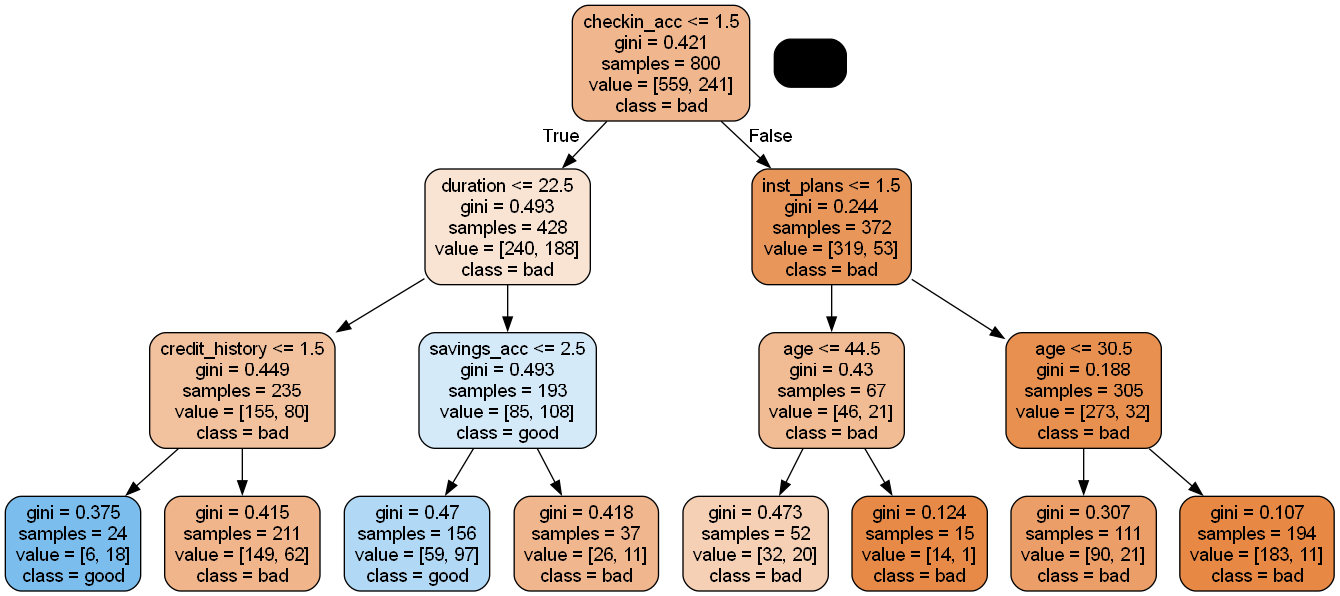

In [11]:
from pydotplus import graph_from_dot_data
from IPython.display import Image
# Train the best model using GridSearchCV
best_model = grid_search.best_estimator_

# Export the decision tree to dot format
dot_data = export_graphviz(best_model, out_file=None, 
                           feature_names=X.columns, 
                           class_names=['bad', 'good'], 
                           filled=True, rounded=True)

# Create and render the graph
graph=graph_from_dot_data(dot_data)
image= Image(graph.create_png())
display(image)

In [9]:
import os
os.environ["PATH"]+= os.pathsep +r"C:\\Program Files\\Graphviz\\bin"

In [12]:
# Get the text representation of the decision tree
tree_rules = export_text(best_model, feature_names=list(X.columns))
print(tree_rules)

|--- checkin_acc <= 1.50
|   |--- duration <= 22.50
|   |   |--- credit_history <= 1.50
|   |   |   |--- class: 1
|   |   |--- credit_history >  1.50
|   |   |   |--- class: 0
|   |--- duration >  22.50
|   |   |--- savings_acc <= 2.50
|   |   |   |--- class: 1
|   |   |--- savings_acc >  2.50
|   |   |   |--- class: 0
|--- checkin_acc >  1.50
|   |--- inst_plans <= 1.50
|   |   |--- age <= 44.50
|   |   |   |--- class: 0
|   |   |--- age >  44.50
|   |   |   |--- class: 0
|   |--- inst_plans >  1.50
|   |   |--- age <= 30.50
|   |   |   |--- class: 0
|   |   |--- age >  30.50
|   |   |   |--- class: 0



# EXER 2

#### Use the iris dataset to implement , Decision tree classifier

Implement a decision tree classifier, Train it on 80% of the dataset and test on the remaining 20%.<br>
Print the classification report and confusion matrix.<br>
Optimize Hyperparameters Using Grid Search<br>
•	Use GridSearchCV to tune max_depth, min_samples_split, and criterion.<br>
•	Report the best hyperparameter combination and corresponding accuracy.
Pruning the Decision Tree<br>
•	Implement post-pruning using cost-complexity pruning (ccp_alpha).<br>
•	Find the optimal ccp_alpha by plotting accuracy vs. ccp_alpha values.<br>
Feature Importance Analysis
•	Extract and plot feature importance values from the trained decision tree.<br>
•	Drop the least important feature and retrain the model. Does accuracy improve or decline?<br>

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the iris dataset
iris = load_iris()

# Create a DataFrame
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_iris = DecisionTreeClassifier(random_state=42)
dt_iris.fit(X_train, y_train)

# Make predictions
y_pred = dt_iris.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [14]:
# Define the parameter grid for hyperparameter tuning
param_grid_iris = {
    'max_depth': range(2, 11),
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Set up GridSearchCV with 10-fold cross-validation
grid_search_iris = GridSearchCV(dt_iris, param_grid_iris, cv=10, scoring='accuracy', verbose=1)

# Fit the model
grid_search_iris.fit(X_train, y_train)

# Get the best parameters and accuracy
best_params_iris = grid_search_iris.best_params_
best_accuracy_iris = grid_search_iris.best_score_

print("Best Parameters for Iris Dataset:", best_params_iris)
print("Best Accuracy for Iris Dataset:", best_accuracy_iris)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Best Parameters for Iris Dataset: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Best Accuracy for Iris Dataset: 0.9416666666666667


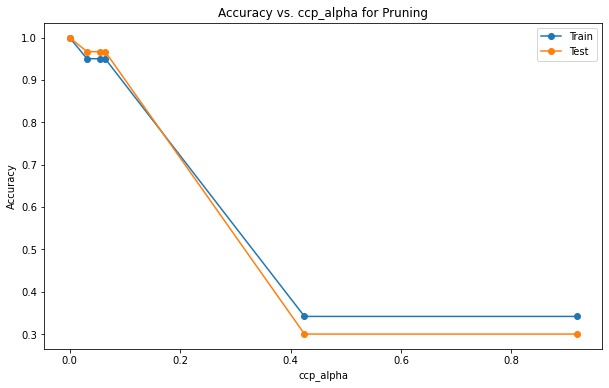

In [15]:
import matplotlib.pyplot as plt

# Get the best estimator from GridSearchCV
best_dt_iris = grid_search_iris.best_estimator_

# Calculate the cost-complexity pruning path
path = best_dt_iris.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Train decision trees for each ccp_alpha
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

# Calculate the accuracy for each tree
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

# Plot accuracy vs. ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label='Train', marker='o')
plt.plot(ccp_alphas, test_scores, label='Test', marker='o')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. ccp_alpha for Pruning')
plt.legend()
plt.show()

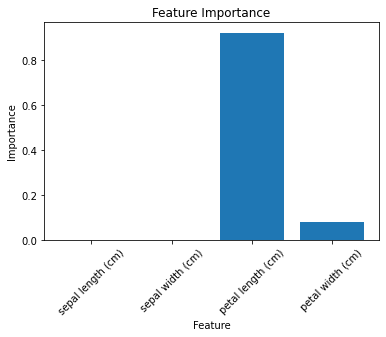

In [16]:
# Plot feature importance
feature_importances = best_dt_iris.feature_importances_
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Drop the least important feature
least_important_feature = X.columns[feature_importances.argmin()]
X_reduced = X.drop(columns=[least_important_feature])

# Split the reduced data into train and test sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Retrain the decision tree with the reduced features
dt_reduced = DecisionTreeClassifier(random_state=42)
dt_reduced.fit(X_train_reduced, y_train)

# Make predictions and evaluate the model
y_pred_reduced = dt_reduced.predict(X_test_reduced)
print("Classification report with reduced features:")
print(classification_report(y_test, y_pred_reduced))
print(confusion_matrix(y_test, y_pred_reduced))

Classification report with reduced features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [18]:
reduced_accuracy=accuracy_score(y_test, y_pred_reduced)
print(reduced_accuracy)

1.0


In [19]:
### Accuracy is same after dropping the features too.